In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

2
intercept: 22667.480806544423
theta: [-5.65082659e+00  1.43806199e+01 -1.58450791e+02 -7.47555922e+03
 -1.98583215e+03  2.24111067e+03  7.58964004e-01 -5.65082671e+00
  1.43806201e+01 -4.17138735e+01  1.31492669e+01  3.59932852e-03]
Alpha 2
train RMSE: 135447.8882433454
train R2 0.9630804792079575
test RMSE: 494026.84530747845
test R2 0.48256999034670833
4
intercept: 22518.011786004354
theta: [-5.68605690e+00  1.43958983e+01 -1.58412683e+02 -7.26558429e+03
 -1.93516927e+03  2.19319400e+03  7.58923009e-01 -5.68605696e+00
  1.43958984e+01 -4.17190213e+01  1.31815855e+01  3.59581887e-03]
Alpha 4
train RMSE: 135448.094930527
train R2 0.9630803665329262
test RMSE: 494120.25955908356
test R2 0.4823742928562964
8
intercept: 22241.471375223366
theta: [-5.75032468e+00  1.44239149e+01 -1.58340335e+02 -6.87903356e+03
 -1.84086865e+03  2.10392785e+03  7.58847619e-01 -5.75032471e+00
  1.44239149e+01 -4.17277191e+01  1.32410105e+01  3.58928219e-03]
Alpha 8
train RMSE: 135448.8235703602
train R2 0.

train RMSE: 136175.99508773297
train R2 0.9626824869297358
test RMSE: 493179.57265195774
test R2 0.48434328814794037
16777216
intercept: 1711.225887997367
theta: [-1.30020414e+00  1.10092239e+01 -1.47041977e+01 -3.69102102e-02
 -2.46114880e-01 -2.66762344e-01  7.57402838e-01 -1.30020414e+00
  1.10092239e+01 -1.97071121e+01 -1.67122537e+00 -1.37329798e-03]
Alpha 16777216
train RMSE: 136366.33157978786
train R2 0.9625780948382744
test RMSE: 458464.46501812694
test R2 0.5543828728266117
33554432
intercept: -1067.4592361562536
theta: [-6.96767795e-01  8.09009359e+00 -7.39141457e+00 -1.97240177e-02
 -1.37083034e-01 -1.51655873e-01  7.55817623e-01 -6.96767795e-01
  8.09009359e+00 -1.51104526e+01 -1.03908504e+00 -1.65584022e-03]
Alpha 33554432
train RMSE: 136566.72455465514
train R2 0.9624680295921011
test RMSE: 419091.0220136033
test R2 0.6276363921501106
67108864
intercept: -3470.4629020027933
theta: [-3.52217992e-01  5.29248934e+00 -3.55482433e+00 -1.05776031e-02
 -7.16778578e-02 -8.102081

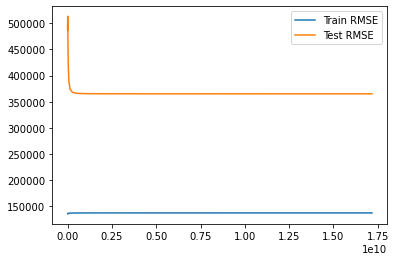

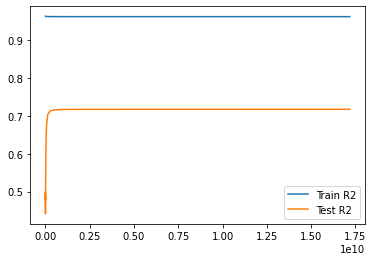

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#import matplotlib.plotly as plt

df = pd.read_csv('3_mo_weekly.csv', sep='\t')

train = df[df['Date'] <= '2020-10-18']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-10-18']
test = test[test['Week + 1'] > 0]
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

#scaler = StandardScaler()
##train_t = scaler.fit_transform(X_train)
#val_t = scaler.transform(X_test)
#X_train = pd.DataFrame(train_t)
#X_test = pd.DataFrame(val_t)

alphas = [2**k for k in range(1,35)]
for alpha in alphas:
    print(alpha)
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    print('intercept:',linreg.intercept_)
    print('theta:',linreg.coef_)
    #    
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)
    print
    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

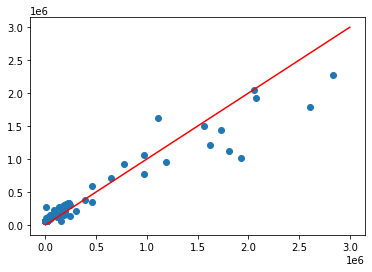

In [46]:
#plt.hist(y_train)
#plt.semilogx()
#plt.show
plt.scatter(y_test, y_test_pred)
plt.plot([0, 3e6], [0,3e6], c='r')
#plt.semilogx()

intercept: 217425.0654205607
theta: [-2.37238522e+03 -2.98988423e+00  1.01204059e+03 -2.10405296e+04
 -4.81418295e+03  6.53333004e+04 -6.66406999e+04  6.26357691e+05
 -2.98988423e+00  1.01204059e+03 -5.20855784e+04 -2.03392300e+03
  1.23518156e+04]
Alpha -5
train RMSE: 121151.65839258961
train R2 0.958631799240963
test RMSE: 235380.60232222715
test R2 0.7510936647202204


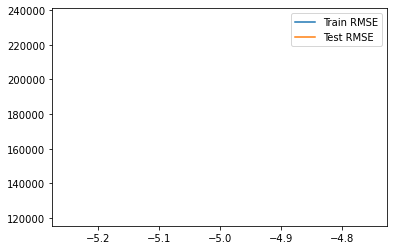

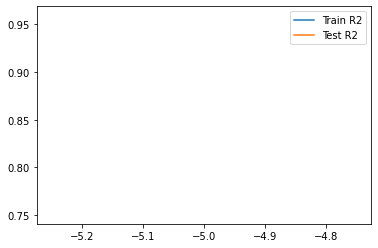

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

df_weekly = df_weekly[df_weekly.Weekly != 0]

train = df_weekly[df_weekly['Date'] <= '2020-10-15']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df_weekly[df_weekly['Date'] > '2020-10-15']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

        
scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)


train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [-5] #[2**k for k in range(-10,10)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    print('intercept:',linreg.intercept_)
    print('theta:',linreg.coef_)
        
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)

    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

C:\Users\nclan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.0321e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


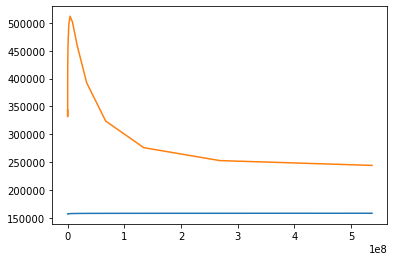

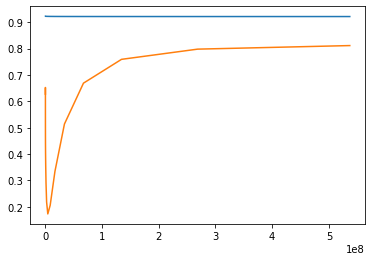

max train rmse 157240.68875357404
max_train_r2 0.9228839798557805
max test rmse 244266.65740029264
max test r2 0.8116088784714245


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('3_mo_weekly2.csv', sep='\t')

train = df[df['Date'] <= '2020-11-01']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-11-01']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

#scaler = StandardScaler()
#train_t = scaler.fit_transform(X_train)
#val_t = scaler.transform(X_test)

#X_train = pd.DataFrame(train_t)
#X_test = pd.DataFrame(val_t)

alphas = [2**k for k in range(-1,30)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)


    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    #print('Alpha', alpha)
    #print('train RMSE:',(train_rmse))
    #print('train R2', train_r2)
    #print('test RMSE:',(test_rmse))
    #print('test R2', test_r2)
    train_rmse_list.append(train_rmse)
    #print
    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list)
plt.plot(alphas, test_rmse_list)
plt.show()
plt.plot(alphas, train_r2_list)
plt.plot(alphas, test_r2_list)
plt.show()
print('max train rmse', min(train_rmse_list))
print('max_train_r2', max(train_r2_list))
print('max test rmse', min(test_rmse_list))
print('max test r2', max(test_r2_list))

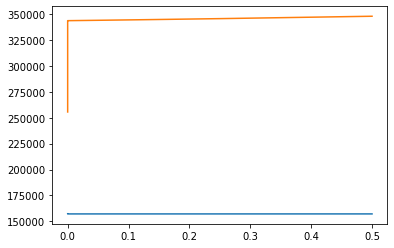

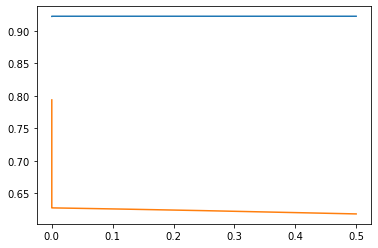

min train rmse 157240.6874217472
max_train_r2 0.9228839811621242
min test rmse 255531.99495794106
max test r2 0.7938313516319967


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('3_mo_weekly2.csv', sep='\t')

train = df[df['Date'] <= '2020-11-01']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-11-01']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)

alphas = [0] + [2**k for k in range(-30,0)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)


    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    #print('Alpha', alpha)
    #print('train RMSE:',(train_rmse))
    #print('train R2', train_r2)
    #print('test RMSE:',(test_rmse))
    #print('test R2', test_r2)
    train_rmse_list.append(train_rmse)
    #print
    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list)
plt.plot(alphas, test_rmse_list)
plt.show()
plt.plot(alphas, train_r2_list)
plt.plot(alphas, test_r2_list)
plt.show()
print('min train rmse', min(train_rmse_list))
print('max_train_r2', max(train_r2_list))
print('min test rmse', min(test_rmse_list))
print('max test r2', max(test_r2_list))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('3_mo_weekly.csv', sep='\t')

train = df[df['Date'] <= '2020-10-18']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-10-18']
test = test[test['Week + 1'] > 0]
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)

rs=22
max_depth = [k**2 for k in range(1,7)] 
max_features = [.5, .6, .7, .8, .9, 1]
for depth in max_depth:
        for feature in max_features:
            rf_reg = RandomForestRegressor(max_depth=depth, max_features=feature, random_state=rs)
            rf_reg.fit(X_train, y_train)

            mean = np.mean(y_train)

            y_train_pred = rf_reg.predict(X_train)
            y_test_pred = rf_reg.predict(X_test)

            train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
            train_r2 = r2_score(y_train,y_train_pred)

            test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
            test_r2 = r2_score(y_test, y_test_pred)

            train_rmse_list.append((train_rmse, depth, feature))
            test_rmse_list.append((test_rmse, depth, feature))
            train_r2_list.append((train_r2, depth, feature))
            test_r2_list.append((test_r2, depth, feature))
            print(train_rmse, train_r2)
            
min_score = min(test_rmse_list, key = lambda x: x[0])
max_r2_score = max(test_r2_list, key = lambda x: x[0])

print(f"  min max_depth: {min_score[1]}, min max_features: {min_score[2]}")
print(f"  min val rmse: {min_score[0]}")
print(f"  max max_depth: {max_r2_score[1]}, max max_features: {max_r2_score[2]}")
print(f"  max val rmse: {max_r2_score[0]}")

335406.9572724429 0.7736107961055245
327025.54435124696 0.7847838128185491
310267.8001616129 0.8062753024260259
302577.76701978437 0.81575928700621
297086.6363880548 0.8223857476605241
556128.4699721396 0.3776111041986826
85586.42015235295 0.9852591915971617
81783.66664797078 0.9865400101069475
79451.164943338 0.987296829786916
78182.30789983337 0.9876993361191332
79342.91826357086 0.9873314205767784
211506.46998901822 0.9099758783806285
70413.51564511389 0.9900224563665836
67003.10791641865 0.9909655550874095
66239.20365582047 0.9911703846649902
67512.23808757891 0.9908277350873256
66202.64022183909 0.9911801297083155
117214.27301012854 0.9723514363066449
70556.72570527198 0.9899818295728605
66975.28284521407 0.9909730571834576
63761.12988223537 0.9918186760890518
68727.97934194589 0.9904944176295933
67292.62387146686 0.9908873119437812
113634.75507973378 0.974014328793968
70296.80235386528 0.9900555053297605
67294.37038961457 0.9908868389147719
65056.88824164788 0.9914827743818564
68

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

df = pd.read_csv('3_mo_weekly.csv', sep='\t')

train = df[df['Date'] <= '2020-10-18']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-10-18']
test = test[test['Week + 1'] > 0]
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)

rs=22
gamma_vals = [2**k for k in range(-50,-45)]
C_vals = [2**k for k in range(15,21)] 
for gamma in gamma_vals:
        for C in C_vals:
            
            svm_reg = SVR(kernel='linear', gamma=gamma, C=C)
            svm_reg.fit(X_train, y_train)

            y_train_pred = svm_reg.predict(X_train)
            y_test_pred = svm_reg.predict(X_test)

            train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
            train_r2 = r2_score(y_train,y_train_pred)

            test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
            test_r2 = r2_score(y_test, y_test_pred)

            train_rmse_list.append((train_rmse, gamma, C))
            test_rmse_list.append((test_rmse, gamma, C))
            train_r2_list.append((train_r2, gamma, C))
            test_r2_list.append((test_r2, gamma, C))
            
            
min_score = min(test_rmse_list, key = lambda x: x[0])
max_r2_score = max(test_r2_list, key = lambda x: x[0])

print(f"  min Gamma: {min_score[1]}, min C: {min_score[2]}")
print(f"  min val rmse: {min_score[0]}")
print(f"  max Gamma: {max_r2_score[1]}, max C: {max_r2_score[2]}")
print(f"  max val r2: {max_r2_score[0]}")

  min Gamma: 8.881784197001252e-16, min C: 131072
  min val rmse: 313825.17930983304
  max Gamma: 8.881784197001252e-16, max C: 131072
  max val r2: 0.7912021192663787


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

df = pd.read_csv('3_mo_weekly.csv', sep='\t')

train = df[df['Date'] <= '2020-11-01']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df[df['Date'] > '2020-11-01']
test = test[test['Week + 1'] > 0]
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)

rs=22
neighbors = [1,2,3,10,30,100]
weights = ['uniform', 'distance']
for neighbor in neighbors:
        for weight in weights:

            knn_reg = KNeighborsRegressor(n_neighbors=neighbor, weights=weight)
            knn_reg.fit(X_train, y_train)

            mean = np.mean(y_train)

            y_train_pred = knn_reg.predict(X_train)
            y_test_pred = knn_reg.predict(X_test)

            train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
            train_r2 = r2_score(y_train,y_train_pred)

            test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
            test_r2 = r2_score(y_test, y_test_pred)

            train_rmse_list.append((train_rmse, neighbor, weight))
            test_rmse_list.append((test_rmse, neighbor, weight))
            train_r2_list.append((train_r2, neighbor, weight))
            test_r2_list.append((test_r2, neighbor, weight))
            
            
min_score = min(test_rmse_list, key = lambda x: x[0])
max_r2_score = max(test_r2_list, key = lambda x: x[0])

print(f"  min Gamma: {min_score[1]}, min C: {min_score[2]}")
print(f"  min val rmse: {min_score[0]}")
print(f"  max Gamma: {max_r2_score[1]}, max C: {max_r2_score[2]}")
print(f"  max val rmse: {max_r2_score[0]}")

  min Gamma: 1, min C: uniform
  min val rmse: 290898.3620287602
  max Gamma: 1, max C: uniform
  max val rmse: 0.8476205677342399


In [43]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

def train_model():
    df = pd.read_csv('3_mo_weekly.csv', sep='\t')

    train = df[df['Date'] <= '2020-10-18']
    train = train.drop(['Date', 'Release', 'Y'],axis=1)
    y_train = train['Week + 1']
    X_train = train.drop('Week + 1', axis = 1)

    test = df[df['Date'] > '2020-10-18']
    test = test[test['Week + 1'] > 0]
    test = test.drop(['Date', 'Release', 'Y'],axis=1)
    y_test = test['Week + 1']
    X_test = test.drop('Week + 1', axis=1)

    rs=22
    max_depth, max_features = 16, .6

    rf_reg = RandomForestRegressor(max_depth=max_depth, max_features=max_features, random_state=rs)
    rf_reg.fit(X_train, y_train)

    return rf_reg
y_pred = train_model().predict(X_test)
r2_score(y_test, y_pred)

0.8458828515635557